In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('Magicbricks.csv')
df.head() 

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


In [3]:
df['Status'].value()

AttributeError: 'Series' object has no attribute 'value'

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1259 non-null   float64
 1   BHK          1259 non-null   int64  
 2   Bathroom     1257 non-null   float64
 3   Furnishing   1254 non-null   object 
 4   Locality     1259 non-null   object 
 5   Parking      1226 non-null   float64
 6   Price        1259 non-null   int64  
 7   Status       1259 non-null   object 
 8   Transaction  1259 non-null   object 
 9   Type         1254 non-null   object 
 10  Per_Sqft     1018 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 108.3+ KB


In [5]:
df.describe()

,Area,BHK,Bathroom,Parking,Price,Per_Sqft
count,1259.000000,1259.000000,1257.000000,1226.000000,1.259000e+03,1018.000000
mean,1466.452724,2.796664,2.556086,1.935563,2.130670e+07,15690.136542
std,1568.055040,0.954425,1.042220,6.279212,2.560115e+07,21134.738568
min,28.000000,1.000000,1.000000,1.000000,1.000000e+06,1259.000000
25%,800.000000,2.000000,2.000000,1.000000,5.700000e+06,6364.000000
50%,1200.000000,3.000000,2.000000,1.000000,1.420000e+07,11291.500000
75%,1700.000000,3.000000,3.000000,2.000000,2.550000e+07,18000.000000
max,24300.000000,10.000000,7.000000,114.000000,2.400000e+08,183333.000000


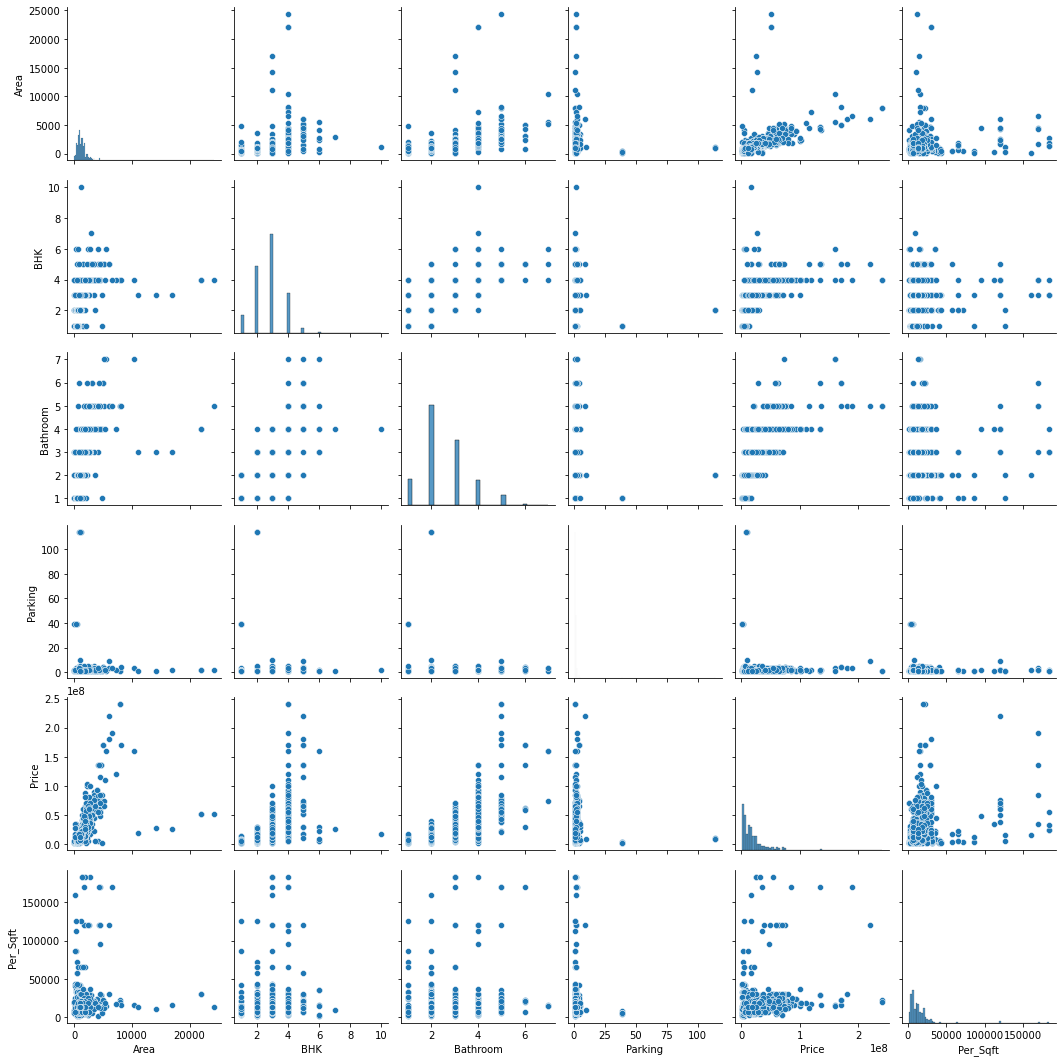

In [6]:
sns.pairplot(df)

C:\Users\deepi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

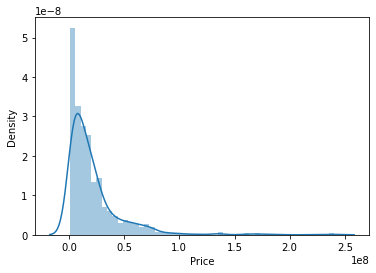

In [7]:
sns.distplot(df['Price'])

<AxesSubplot:>

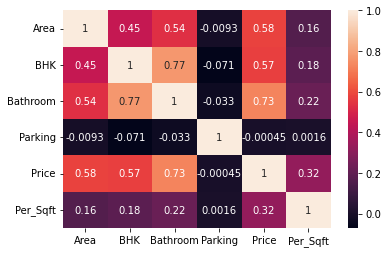

In [8]:
sns.heatmap(df.corr(), annot=True)

In [9]:

from sklearn.preprocessing import LabelEncoder

In [10]:
enc = LabelEncoder()

In [11]:
df['Furnishing']= enc.fit_transform(df['Furnishing'])
df['Status']= enc.fit_transform(df['Status'])
df['Transaction']= enc.fit_transform(df['Transaction'])
df['Type']= enc.fit_transform(df['Type'])
df.drop(['Locality'],axis=1)


,Area,BHK,Bathroom,Furnishing,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,1,1.0,6500000,1,0,1,NaN
1,750.0,2,2.0,1,1.0,5000000,1,0,0,6667.0
2,950.0,2,2.0,0,1.0,15500000,1,1,0,6667.0
3,600.0,2,2.0,1,1.0,4200000,1,1,1,6667.0
4,650.0,2,2.0,1,1.0,6200000,1,0,1,6667.0
...,...,...,...,...,...,...,...,...,...,...
1254,4118.0,4,5.0,2,3.0,55000000,1,0,1,12916.0
1255,1050.0,3,2.0,1,3.0,12500000,1,1,1,12916.0
1256,875.0,3,3.0,1,3.0,17500000,1,0,1,12916.0
1257,990.0,2,2.0,2,1.0,11500000,1,1,1,12916.0


In [12]:
df.isnull().sum()

Area             0
BHK              0
Bathroom         2
Furnishing       0
Locality         0
Parking         33
Price            0
Status           0
Transaction      0
Type             0
Per_Sqft       241
dtype: int64

In [13]:
df['Parking']= df['Parking'].fillna(df['Parking'].mean())
df['Per_Sqft']= df['Per_Sqft'].fillna(df['Per_Sqft'].mean())
df['Bathroom']= df['Bathroom'].fillna(df['Bathroom'].mean())


In [14]:
df.isnull().sum()

Area           0
BHK            0
Bathroom       0
Furnishing     0
Locality       0
Parking        0
Price          0
Status         0
Transaction    0
Type           0
Per_Sqft       0
dtype: int64

In [15]:
X = df[['Area','Status','Transaction','Furnishing','Type','BHK','Bathroom','Parking','Per_Sqft']]

y = df['Price']

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101) 

In [17]:
from sklearn.preprocessing import StandardScaler
 
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)
scaled_df = pd.DataFrame(scaled_data,
                         columns=X.columns)
print(scaled_df.head())

       Area    Status  Transaction  Furnishing      Type       BHK  Bathroom  \
0 -0.425188  0.251684    -1.278238   -0.231005  0.921524  0.213130 -0.534196   
1 -0.457087  0.251684    -1.278238   -0.231005 -1.051603 -0.835038 -0.534196   
2 -0.329490  0.251684     0.782327   -1.761718 -1.051603 -0.835038 -0.534196   
3 -0.552785  0.251684     0.782327   -0.231005  0.921524 -0.835038 -0.534196   
4 -0.520886  0.251684    -1.278238   -0.231005  0.921524 -0.835038 -0.534196   

    Parking      Per_Sqft  
0 -0.151047 -9.576034e-17  
1 -0.151047 -4.750212e-01  
2 -0.151047 -4.750212e-01  
3 -0.151047 -4.750212e-01  
4 -0.151047 -4.750212e-01  


In [19]:
from sklearn.linear_model import LinearRegression 
lm = LinearRegression() 

 

In [20]:
lm.fit(X_train,y_train)

LinearRegression()

In [21]:
lm.intercept_

-15748508.48498765

In [22]:
print(lm.coef_)

[ 4.20609596e+03 -3.99748525e+06 -2.78922801e+06  5.97664079e+05
 -7.26143829e+05 -5.38684875e+05  1.32803551e+07  6.29073503e+04
  1.88105149e+02]


In [23]:
pred = lm.predict(X_test)  

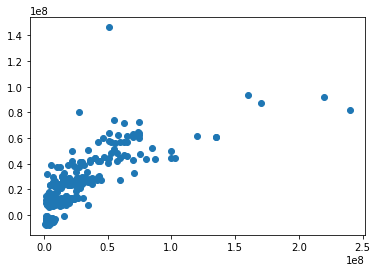

In [24]:
plt.scatter(y_test,pred)

C:\Users\deepi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

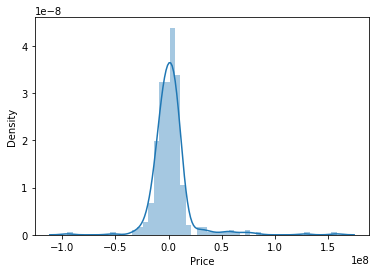

In [29]:
sns.distplot((y_test-pred),bins=50)

In [26]:
lm.score(X_train,y_train)

0.6214519666634319

In [27]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, lm.predict(X_test))
np.sqrt(mse)




18134184.377697892

In [28]:
lm.score(X_test, y_test)

0.593917501000693

# Pickling


In [30]:
import pickle

In [32]:
pickle.dump(lm,open('regmodel.pkl','wb'))

In [33]:
pickle_model= pickle.load(open('regmodel.pkl','rb'))